# Delhivery - Feature Engineering

**About Delhivery :**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors

**Problem statement**

The company wants to understand and process the data coming out of data engineering pipelines:

• I Cleaned, sanitized and manipulated data to get useful features out of raw fields.

• Made a sense out of the raw data to help the data science team to build forecasting models on it.

**scope:**

• This dataset focuses on feature engineering to transform the data into a suitable format for effective analysis and machine learning predictions.



In [131]:
import numpy as np
import pandas as pd

1. Loading and reading the dataset

In [132]:
df = pd.read_csv("delhivery_data.csv")

In [133]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


2. Finding the shape of the *dataset*

In [134]:
df.shape

(144867, 24)

3. Checking for presence of null values

In [135]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

4. Imputing "Unknown" in place of null values present in columns of the dataset.

In [136]:
df = df.fillna("Unknown")

5. Verifying the presence of null values after imputation to ensure they have been properly handled.

In [137]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

6. Merging three unique categorical columns to create a new feature out of it.

In [138]:
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

7. Calculating cumsum() of key columns using group by "Segment_key" operation.

In [139]:
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

In [140]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


8. Checking dataset info like number of columns present and their datatypes.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

9. Creating a dictionary named 'create_segment_dict' for running an operation to specify how to aggregate multiple rows at Segment_level .

In [142]:
create_segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'is_cutoff': 'first',
    'cutoff_factor': 'first',
    'cutoff_timestamp': 'first',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'factor': 'mean',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_factor': 'mean',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
}

10. Aggregating rows based on the parameters provided to each column

In [143]:
segment_df = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segemt_df = segment_df.sort_values(by = ['segment_key', 'od_end_time'])

In [144]:
segment_df.head(5)

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,3464.0,4540.1261,1.741964,728.0,534.0,670.6205,1.893007,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,4323.0,6037.6386,2.150702,820.0,474.0,649.8528,2.134213,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,55.0,60.3157,1.746424,46.0,26.0,28.1995,1.795767,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,155.0,209.1151,1.875977,95.0,39.0,55.9899,2.912963,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,1427.0,1975.7409,1.737898,608.0,231.0,317.7408,2.326577,608.0,317.7408,231.0


11. Formatting key columns to extract new columns, and splitting existing columns into more effective way for draining patterns out of it.

In [145]:
# Changing key numeric columns to datatime to extact new columns out of it.

segment_df['od_start_time'] = pd.to_datetime(segment_df['od_start_time'])
segment_df['od_end_time'] = pd.to_datetime(segment_df['od_end_time'])
segment_df['trip_creation_time'] = pd.to_datetime(segment_df['trip_creation_time'])

In [146]:
# Calculating differnece betwen od_end_time and od_start_time

segment_df['od_time_diff_hr'] = (segment_df['od_end_time'] - segment_df['od_start_time']).dt.total_seconds()/3600
segment_df = segment_df.drop(columns = ['od_start_time', 'od_end_time'])

In [147]:
# Extract features from destination_name
destination_split = segment_df['destination_name'].str.extract(r'(?:(?P<destination_city>[^_]+)_)?(?:(?P<destination_place_code>[^_]+)_)?(?:(?P<destination_code>[^ ]+))? \((?P<destination_state>[^)]+)\)')
segment_df = pd.concat([segment_df, destination_split], axis=1)
segment_df = segment_df.drop(columns=['destination_name'])

In [148]:
# Extract features from source_name
source_split = segment_df['source_name'].str.extract(
    r'(?:(?P<source_city>[^_]+)_)?(?:(?P<source_place_code>[^_]+)_)?(?:(?P<source_code>[^ ]+))? \((?P<source_state>[^)]+)\)'
)
segment_df = pd.concat([segment_df, source_split], axis=1)
segment_df = segment_df.drop(columns=['source_name'])


In [149]:
# Exracting new columns out of existing column

segment_df['trip_creation_year'] = segment_df['trip_creation_time'].dt.year
segment_df['trip_creation_month'] = segment_df['trip_creation_time'].dt.month
segment_df['trip_creation_day'] = segment_df['trip_creation_time'].dt.day
segment_df['trip_creation_hour'] = segment_df['trip_creation_time'].dt.hour
segment_df['trip_creation_minute'] = segment_df['trip_creation_time'].dt.minute
segment_df['trip_creation_second'] = segment_df['trip_creation_time'].dt.second
segment_df = segment_df.drop(columns=['trip_creation_time'])

In [150]:
segment_df.head()

,segment_key,data,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,is_cutoff,cutoff_factor,...,source_city,source_place_code,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,IND000000ACB,22680.0,True,22,...,Kanpur,Central,H_6,Uttar Pradesh,2018,9,12,0,0,16
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,IND209304AAA,20979.0,True,22,...,Bhopal,Trnsport,H,Madhya Pradesh,2018,9,12,0,0,16
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,IND562101AAA,174.0,True,9,...,Doddablpur,ChikaDPP,D,Karnataka,2018,9,12,0,0,22
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,IND561203AAB,732.0,True,9,...,Tumkur,Veersagr,I,Karnataka,2018,9,12,0,0,22
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,IND160002AAC,10008.0,True,22,...,Gurgaon,Bilaspur,HB,Haryana,2018,9,12,0,0,33


12. Creating a new dictionary named 'create_trip_dict' for running an operation to specify how to aggregate multiple rows at trip_level (trip_uuid).

In [151]:
create_trip_dict = {
    'segment_key': 'first',                    # Keep the first segment key
    'data': 'first',                           # Keep the first data entry
    'route_schedule_uuid': 'first',            # Keep the first route schedule UUID
    'route_type': 'first',                     # Keep the first route type
    'source_center': 'first',                  # Keep the first source center
    'destination_center': 'last',              # Keep the last destination center
    'start_scan_to_end_scan': 'sum',           # Sum of scan times
    'is_cutoff': 'first',                      # Keep the first is_cutoff value
    'cutoff_factor': 'sum',                    # Sum of cutoff factors
    'cutoff_timestamp': 'first',               # Keep the first cutoff timestamp
    'actual_distance_to_destination': 'sum',   # Sum of actual distances
    'actual_time': 'sum',                      # Sum of actual times
    'osrm_time': 'sum',                        # Sum of OSRM times
    'osrm_distance': 'sum',                    # Sum of OSRM distances
    'factor': 'mean',                          # Mean of factors
    'segment_actual_time': 'sum',              # Sum of segment actual times
    'segment_osrm_time': 'sum',                # Sum of segment OSRM times
    'segment_osrm_distance': 'sum',            # Sum of segment OSRM distances
    'segment_factor': 'mean',                  # Mean of segment factors
    'segment_actual_time_sum': 'sum',          # Sum of segment actual times
    'segment_osrm_distance_sum': 'sum',        # Sum of segment OSRM distances
    'segment_osrm_time_sum': 'sum',            # Sum of segment OSRM times
    'od_time_diff_hr': 'sum',                  # Sum of od_time_diff_hr
    'destination_city': 'first',               # Keep the first destination city
    'destination_place_code': 'first',         # Keep the first destination place code
    'destination_code': 'first',               # Keep the first destination code
    'destination_state': 'first',              # Keep the first destination state
    'source_city': 'first',                    # Keep the first source city
    'source_place_code': 'first',              # Keep the first source place code
    'source_code': 'first',                    # Keep the first source code
    'source_state': 'first',                   # Keep the first source state
    'trip_creation_year': 'first',             # Keep the first trip creation year
    'trip_creation_month': 'first',            # Keep the first trip creation month
    'trip_creation_day': 'first',              # Keep the first trip creation day
    'trip_creation_hour': 'first',             # Keep the first trip creation hour
    'trip_creation_minute': 'first',           # Keep the first trip creation minute
    'trip_creation_second': 'first'            # Keep the first trip creation second
}


13. Performing aggregation based on defined parameters under trip_level

In [152]:
trip_df = segment_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()

In [153]:
trip_df.head()

,trip_uuid,segment_key,data,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,cutoff_factor,...,source_city,source_place_code,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second
0,trip-153671041653548748,trip-153671041653548748_IND209304AAA_IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,IND209304AAA,43659.0,True,44,...,Kanpur,Central,H_6,Uttar Pradesh,2018,9,12,0,0,16
1,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,906.0,True,18,...,Doddablpur,ChikaDPP,D,Karnataka,2018,9,12,0,0,22
2,trip-153671043369099517,trip-153671043369099517_IND000000ACB_IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,IND000000ACB,248631.0,True,44,...,Gurgaon,Bilaspur,HB,Haryana,2018,9,12,0,0,33
3,trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,200.0,True,9,...,None,None,Hub,Maharashtra,2018,9,12,0,1,0
4,trip-153671052974046625,trip-153671052974046625_IND583101AAA_IND583201AAA,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,1586.0,True,66,...,Bellary,WrdN1DPP,Dc,Karnataka,2018,9,12,0,2,9


14. Statistical summary of trip_df after doing some significant feature engineering to columns in the datset.

In [154]:
trip_df_summary = trip_df.describe()
trip_df_summary

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hr,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,...,14817.000000,14817.000000,14817.000000,14817.000000,14817.0,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,9398.345482,30.183438,2288.554169,4076.333941,2091.007289,2784.231856,2.434336,353.892286,180.949787,223.201161,...,353.892286,223.201161,180.949787,8.863253,2018.0,9.120672,18.370790,12.449821,29.853614,29.854626
std,33701.706672,38.216430,8798.110164,15216.870041,7956.882351,10759.101819,1.872130,556.247965,314.542047,416.628374,...,556.247965,416.628374,314.542047,10.986409,0.0,0.325757,7.893275,7.986553,17.398730,17.329229
min,26.000000,9.000000,9.002461,9.000000,6.000000,9.072900,0.610398,9.000000,6.000000,9.072900,...,9.000000,9.072900,6.000000,0.391024,2018.0,9.000000,1.000000,0.000000,0.000000,0.000000
25%,408.000000,9.000000,49.597866,142.000000,62.000000,65.738600,1.644608,66.000000,31.000000,32.654500,...,66.000000,32.654500,31.000000,2.498843,2018.0,9.000000,14.000000,4.000000,15.000000,15.000000
50%,985.000000,18.000000,134.059655,348.000000,167.000000,173.593600,1.994536,147.000000,65.000000,70.154400,...,147.000000,70.154400,65.000000,4.679427,2018.0,9.000000,19.000000,14.000000,30.000000,30.000000
75%,2826.000000,44.000000,463.956888,1063.000000,516.000000,607.677400,2.580882,367.000000,185.000000,218.802400,...,367.000000,218.802400,185.000000,10.636651,2018.0,9.000000,25.000000,20.000000,45.000000,45.000000
max,396800.000000,1722.000000,85110.885093,167920.000000,76953.000000,102415.868000,70.000000,6230.000000,2564.000000,3523.632400,...,6230.000000,3523.632400,2564.000000,131.642533,2018.0,10.000000,30.000000,23.000000,59.000000,59.000000


15. Using "IQR" method to calculate upper and lower boundaries inorder to find outliers.

In [155]:
Q1 = trip_df_summary.loc["25%"]
Q3 = trip_df_summary.loc["75%"]

IQR = Q3 - Q1
print(IQR)

start_scan_to_end_scan            2418.000000
cutoff_factor                       35.000000
actual_distance_to_destination     414.359022
actual_time                        921.000000
osrm_time                          454.000000
osrm_distance                      541.938800
factor                               0.936275
segment_actual_time                301.000000
segment_osrm_time                  154.000000
segment_osrm_distance              186.147900
segment_factor                       1.042132
segment_actual_time_sum            301.000000
segment_osrm_distance_sum          186.147900
segment_osrm_time_sum              154.000000
od_time_diff_hr                      8.137808
trip_creation_year                   0.000000
trip_creation_month                  0.000000
trip_creation_day                   11.000000
trip_creation_hour                  16.000000
trip_creation_minute                30.000000
trip_creation_second                30.000000
dtype: float64


16. Visualization of Outliers presence in every column using Box plots

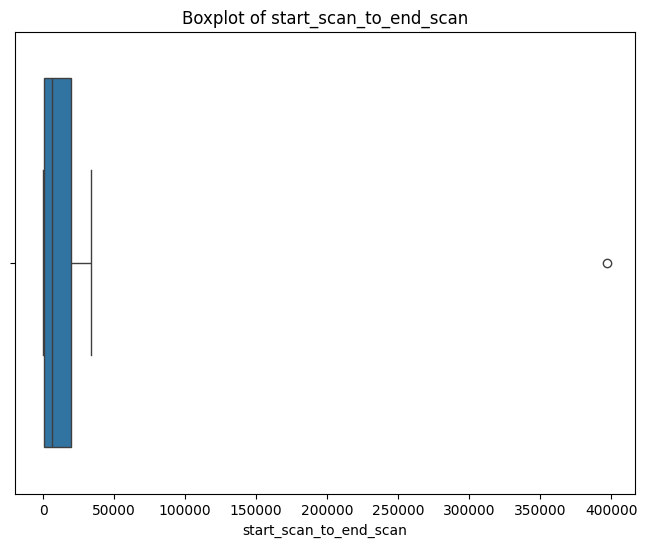

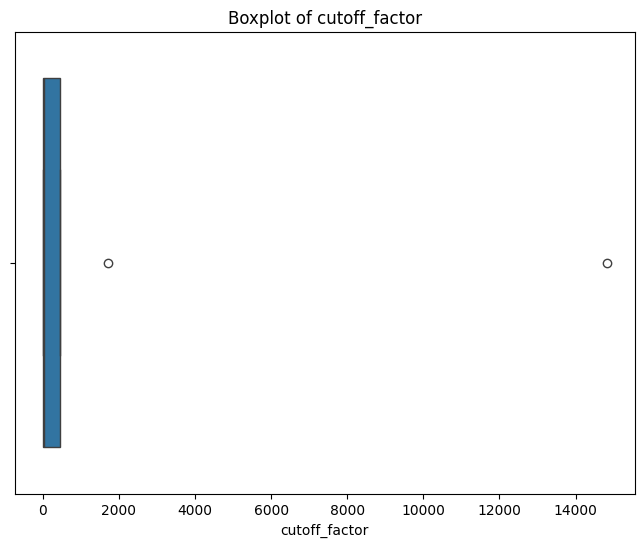

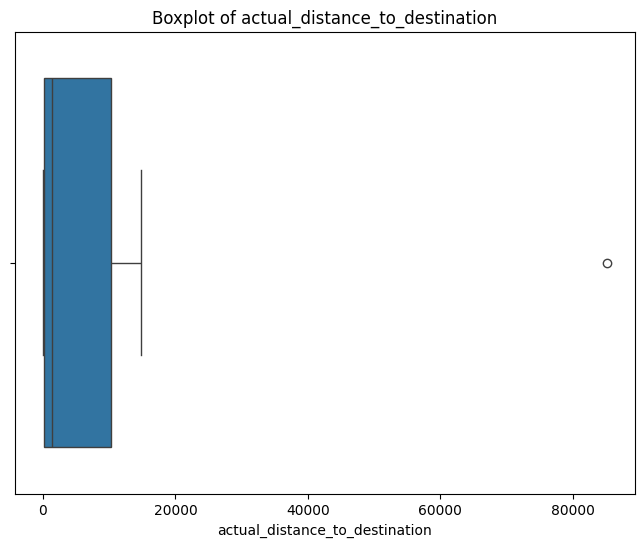

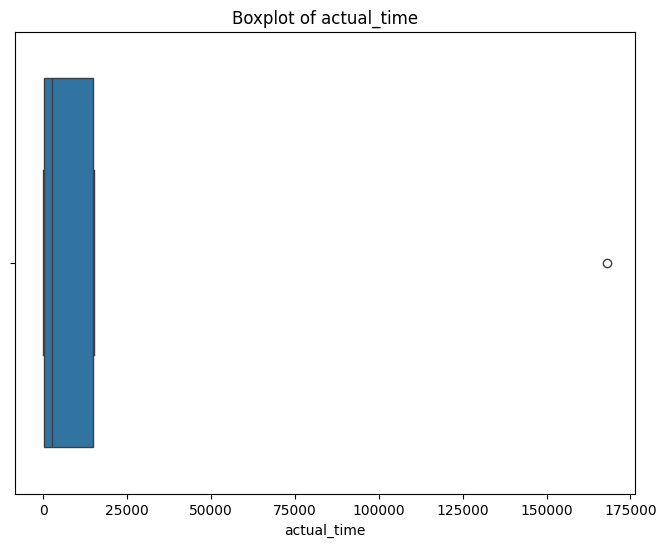

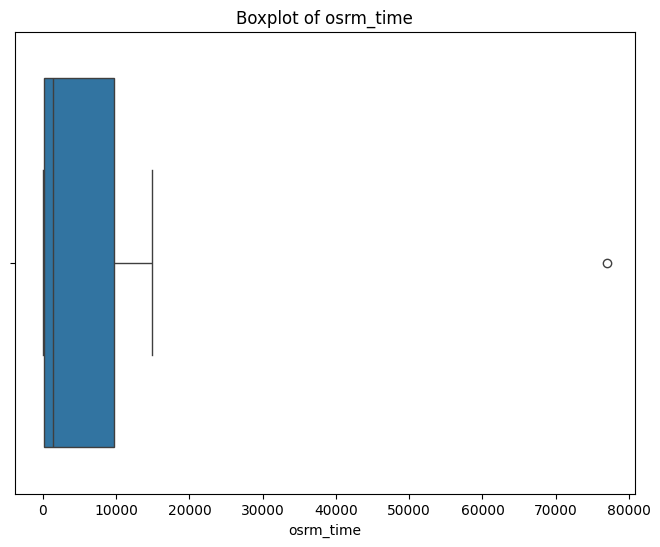

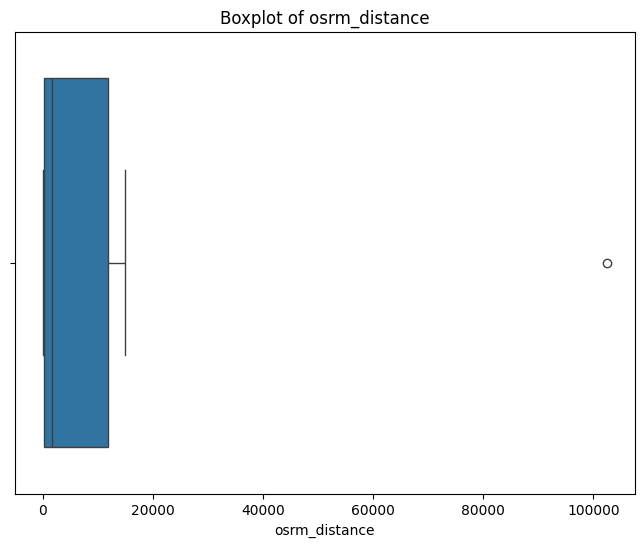

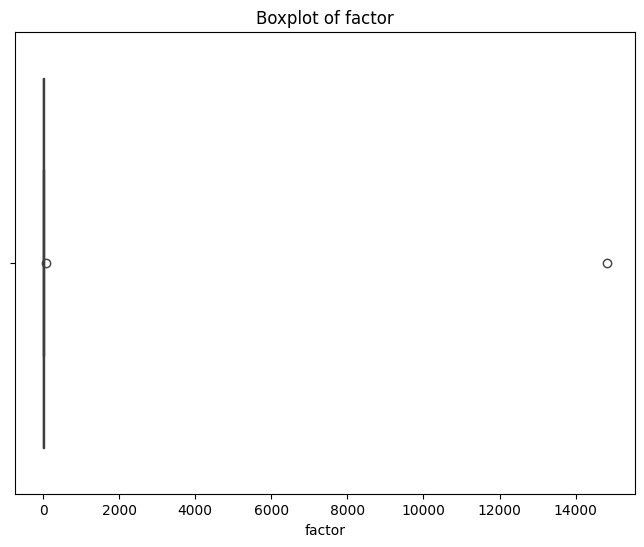

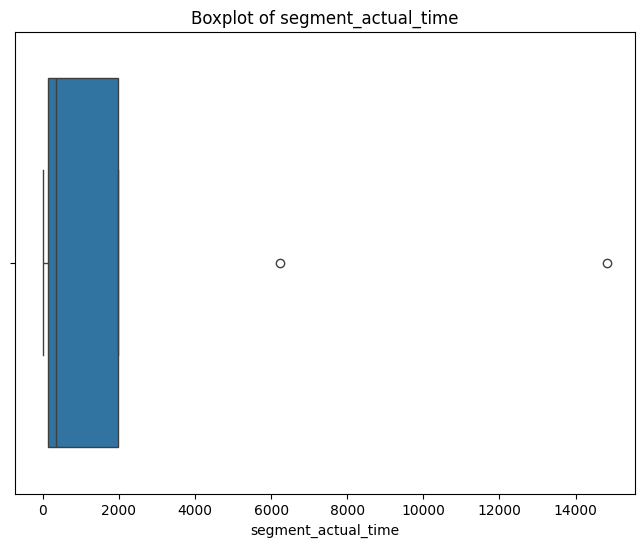

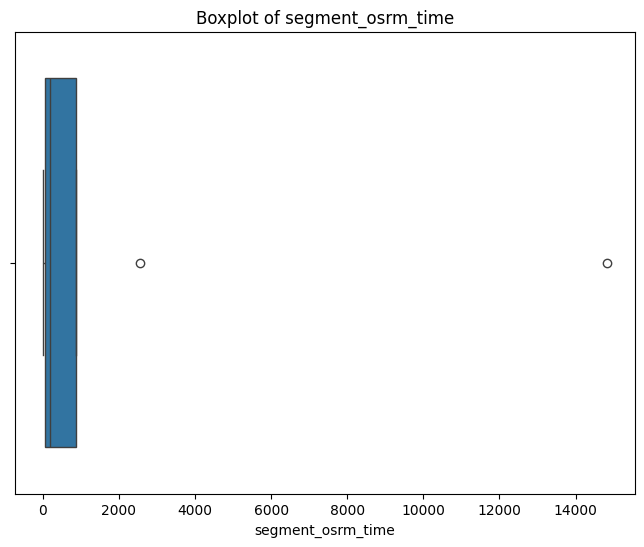

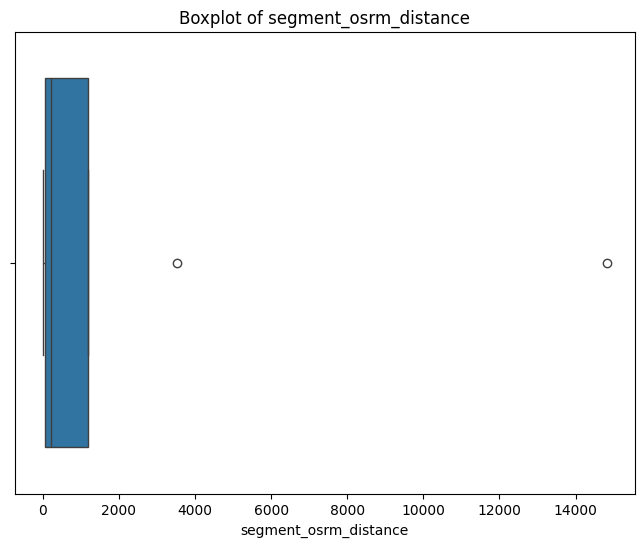

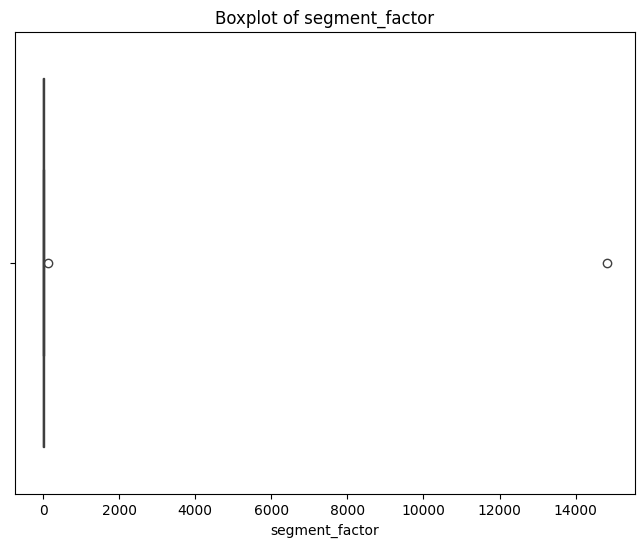

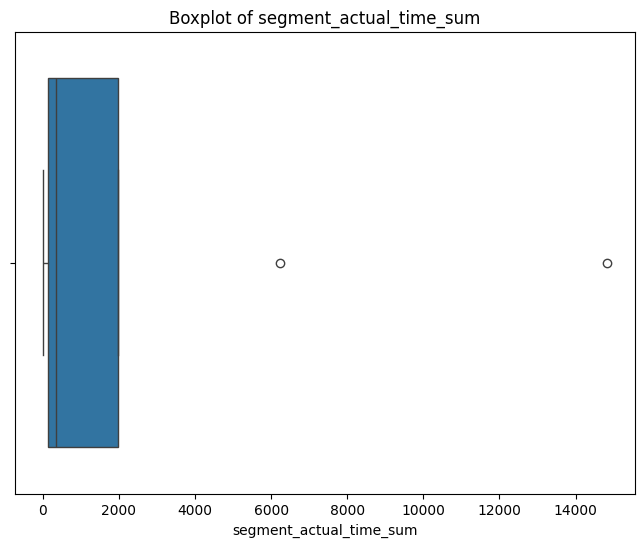

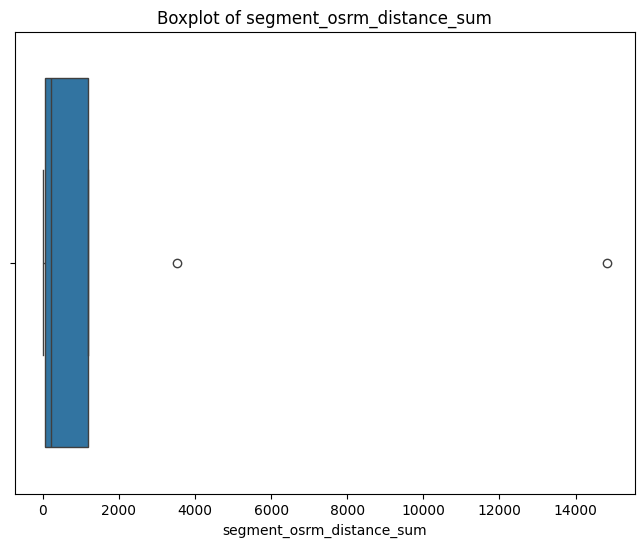

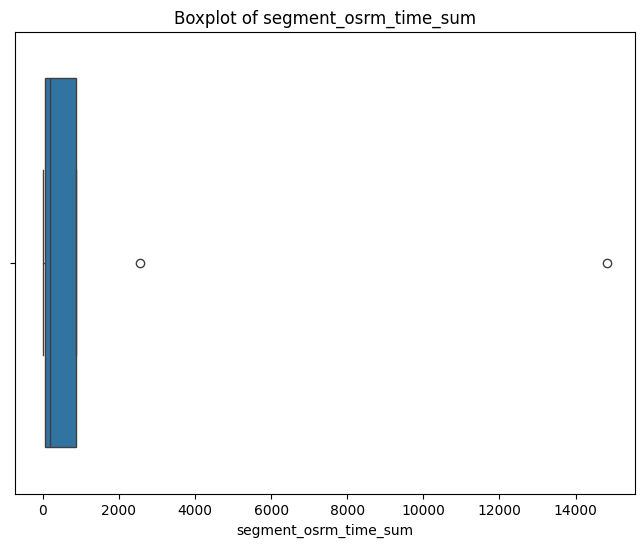

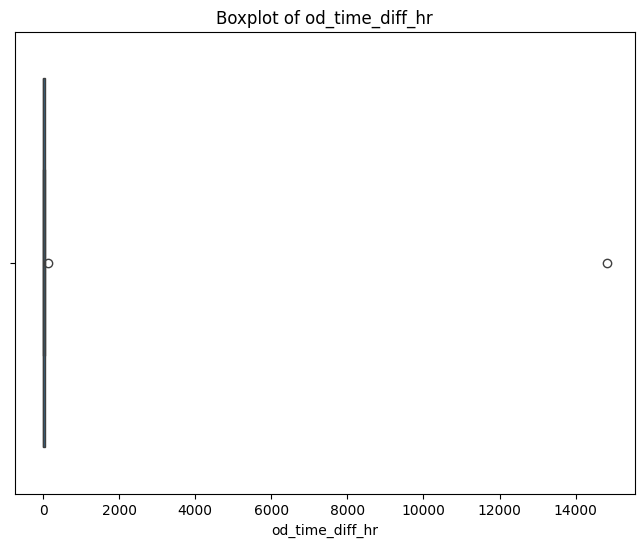

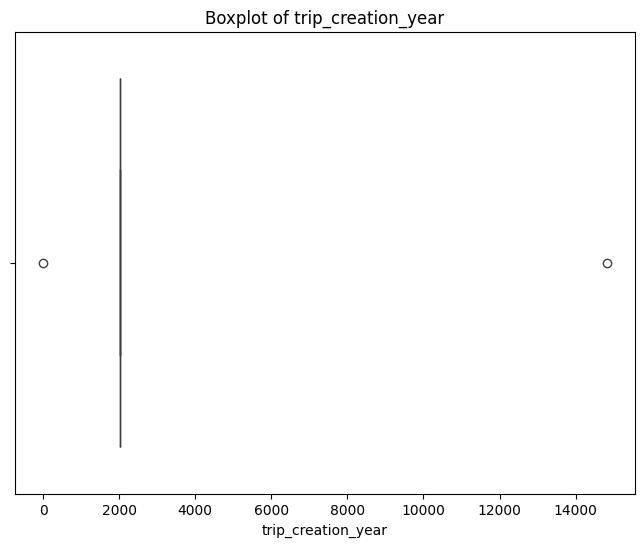

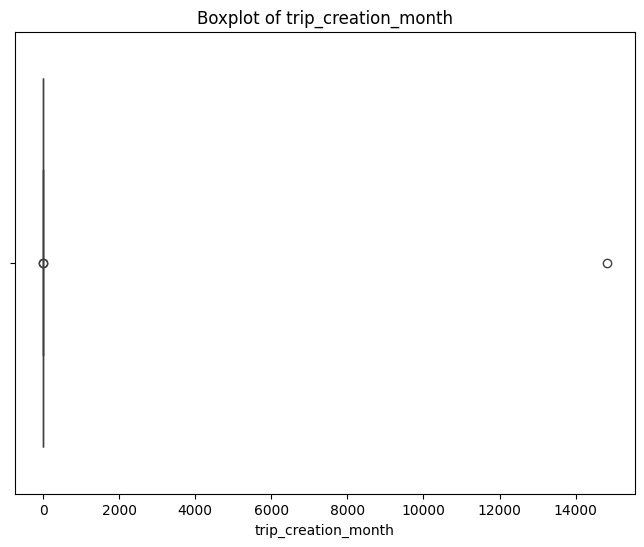

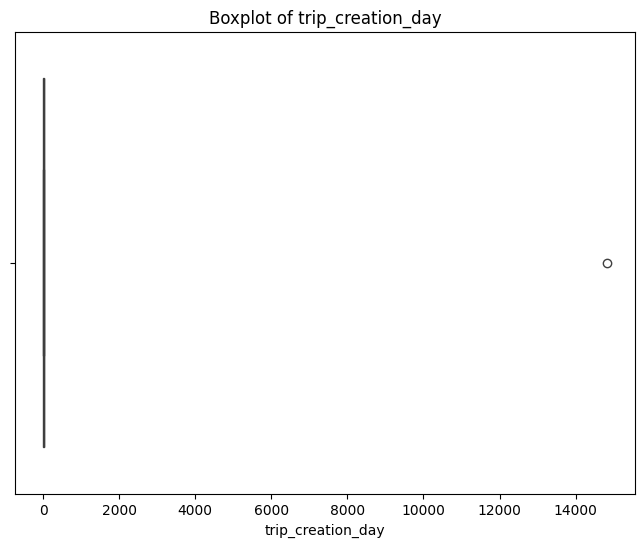

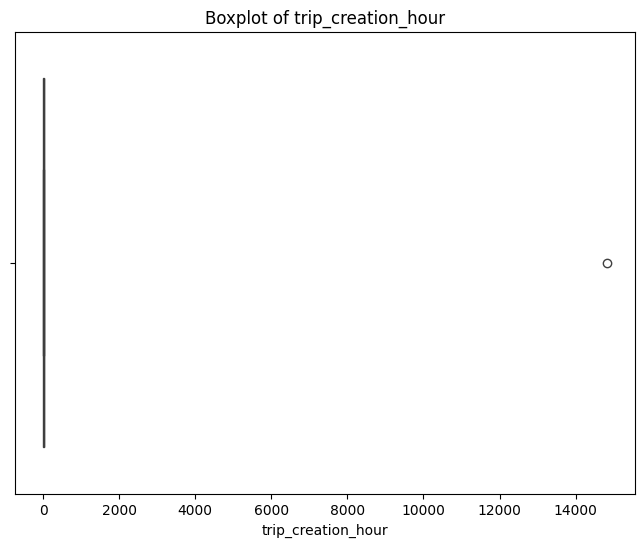

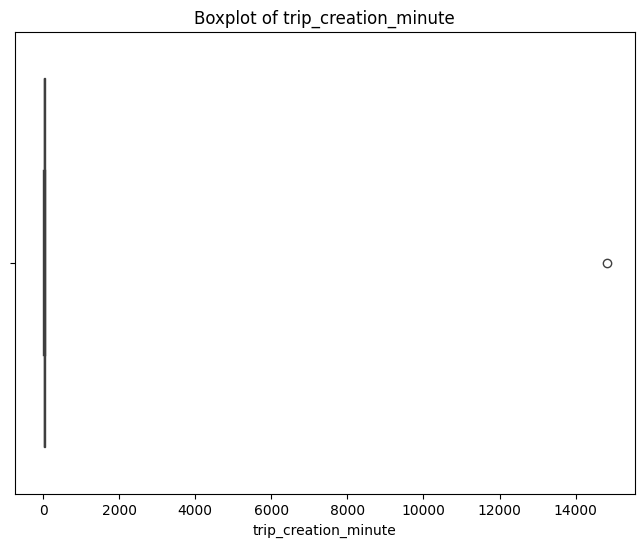

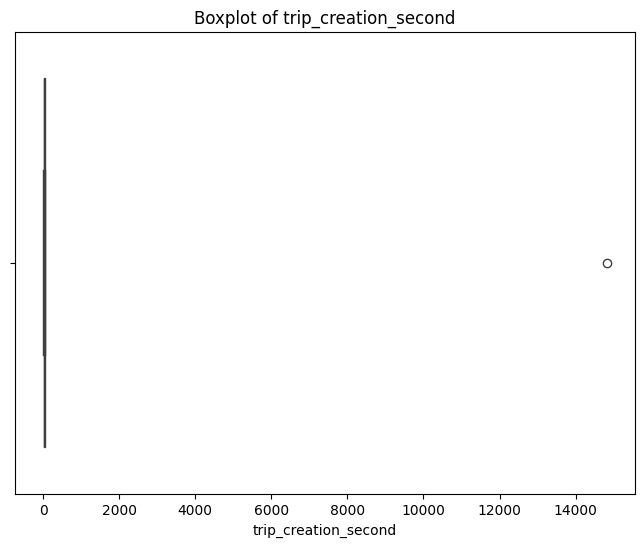

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in trip_df_summary:
  plt.figure(figsize = (8, 6))
  sns.boxplot(x = trip_df_summary[col])
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)
  plt.show()

In [156]:
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR

bounds_df = pd.DataFrame({"LowerBound" :Lower_bound,"UpperBound" :Upper_bound})
print(bounds_df)

                                 LowerBound   UpperBound
start_scan_to_end_scan         -3219.000000  6453.000000
cutoff_factor                    -43.500000    96.500000
actual_distance_to_destination  -571.940666  1085.495420
actual_time                    -1239.500000  2444.500000
osrm_time                       -619.000000  1197.000000
osrm_distance                   -747.169600  1420.585600
factor                             0.240196     3.985294
segment_actual_time             -385.500000   818.500000
segment_osrm_time               -200.000000   416.000000
segment_osrm_distance           -246.567350   498.024250
segment_factor                     0.031480     4.200008
segment_actual_time_sum         -385.500000   818.500000
segment_osrm_distance_sum       -246.567350   498.024250
segment_osrm_time_sum           -200.000000   416.000000
od_time_diff_hr                   -9.707869    22.843363
trip_creation_year              2018.000000  2018.000000
trip_creation_month            

17. Total number of outliers present in every column

In [157]:
outliers_lower= (trip_df_summary<Lower_bound).sum()
outliers_upper= (trip_df_summary>Upper_bound).sum()
total_outliers= outliers_lower + outliers_upper

ouliers_count_df = pd.DataFrame({"LowerBound_outliers" :outliers_lower, "UpperBound_outliers":outliers_upper, "Total":total_outliers})

print(ouliers_count_df)

                                LowerBound_outliers  UpperBound_outliers  \
start_scan_to_end_scan                            0                    4   
cutoff_factor                                     0                    2   
actual_distance_to_destination                    0                    4   
actual_time                                       0                    4   
osrm_time                                         0                    4   
osrm_distance                                     0                    4   
factor                                            0                    2   
segment_actual_time                               0                    2   
segment_osrm_time                                 0                    2   
segment_osrm_distance                             0                    2   
segment_factor                                    1                    2   
segment_actual_time_sum                           0                    2   
segment_osrm

18. Removing outliers data to make the datset more manageable without any bias.

In [158]:
for column in trip_df.select_dtypes(include='number').columns:
    trip_df = trip_df[(trip_df[column] >= Lower_bound[column]) & (trip_df[column] <= Upper_bound[column])]

19. Rechecking the max values of each columns after removing the existing outliers with 'describe' function.

In [159]:
trip_df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hr,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second
count,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,...,9050.000000,9050.000000,9050.000000,9050.000000,9050.0,9050.0,9050.000000,9050.000000,9050.000000,9050.000000
mean,1139.941326,22.993591,189.607805,403.818564,207.270608,239.226923,2.034572,146.027293,78.568066,87.823524,...,146.027293,87.823524,78.568066,4.733798,2018.0,9.0,20.658122,12.563094,29.713702,29.692044
std,1130.092076,21.683030,210.227068,414.376040,209.391446,258.005519,0.626715,126.968333,67.886323,79.189409,...,126.968333,79.189409,67.886323,3.710843,0.0,0.0,5.385998,8.036870,17.369621,17.300171
min,26.000000,9.000000,9.002461,9.000000,7.000000,9.072900,0.610398,9.000000,7.000000,9.072900,...,9.000000,9.072900,7.000000,0.391024,2018.0,9.0,12.000000,0.000000,0.000000,0.000000
25%,348.000000,9.000000,48.670468,115.000000,57.000000,63.185750,1.580995,55.000000,29.000000,29.940400,...,55.000000,29.940400,29.000000,2.130834,2018.0,9.0,16.000000,4.000000,15.000000,15.000000
50%,730.000000,9.000000,96.842566,239.000000,121.000000,128.075000,1.921249,96.000000,53.000000,53.472500,...,96.000000,53.472500,53.000000,3.540827,2018.0,9.0,21.000000,15.000000,30.000000,30.000000
75%,1510.750000,27.000000,258.933178,552.750000,290.000000,323.595100,2.398786,203.000000,113.000000,129.513050,...,203.000000,129.513050,113.000000,6.144104,2018.0,9.0,25.000000,20.000000,45.000000,44.000000
max,6436.000000,96.000000,1082.991668,2444.000000,1194.000000,1390.708100,3.980096,798.000000,403.000000,461.225700,...,798.000000,461.225700,403.000000,22.789610,2018.0,9.0,30.000000,23.000000,59.000000,59.000000


20. Histogram Visualization of every numerical column to identify the skewness and pattern of dstribution of datapoints.

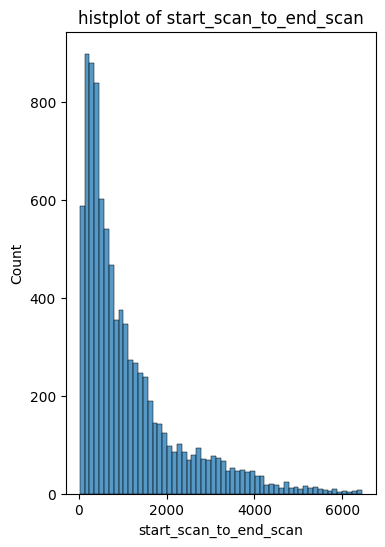

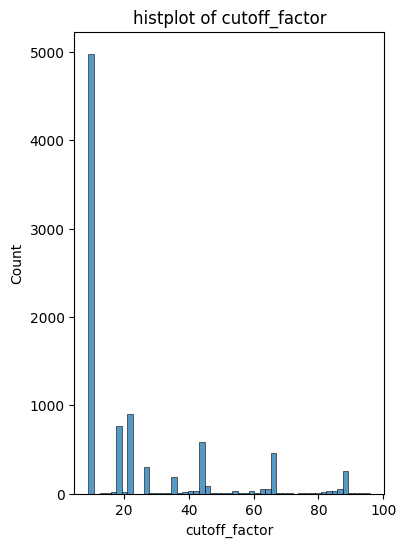

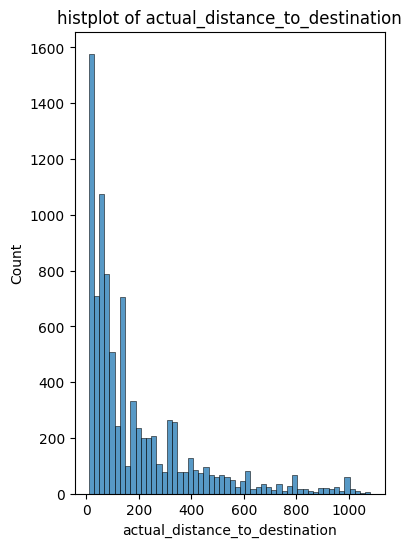

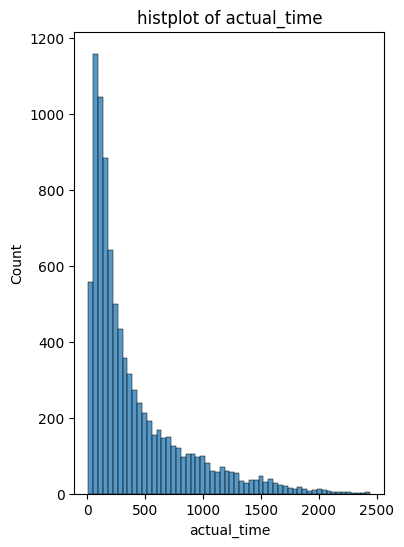

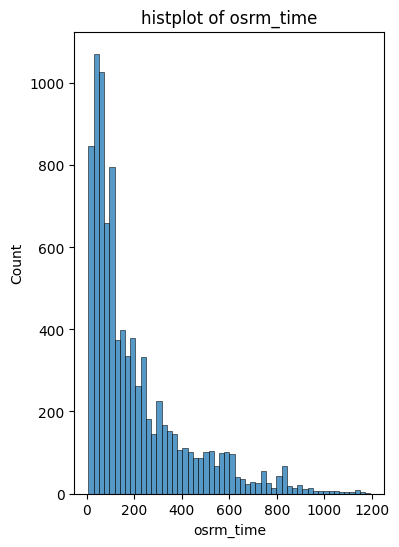

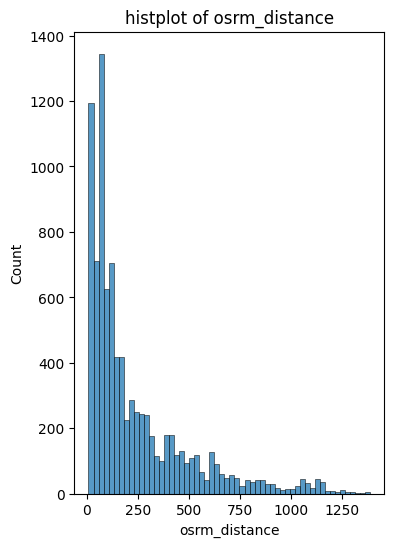

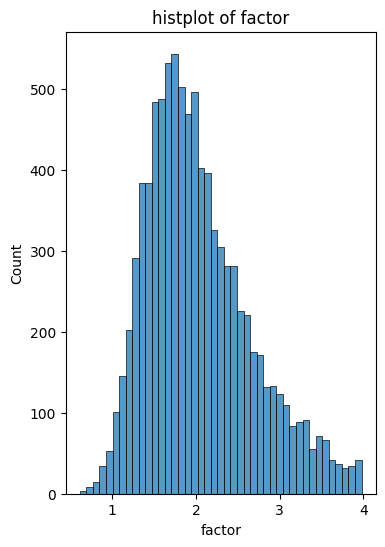

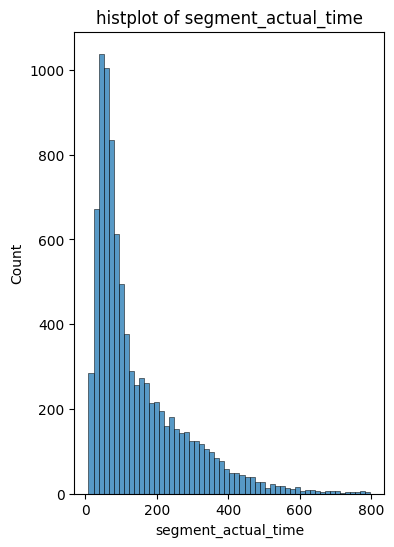

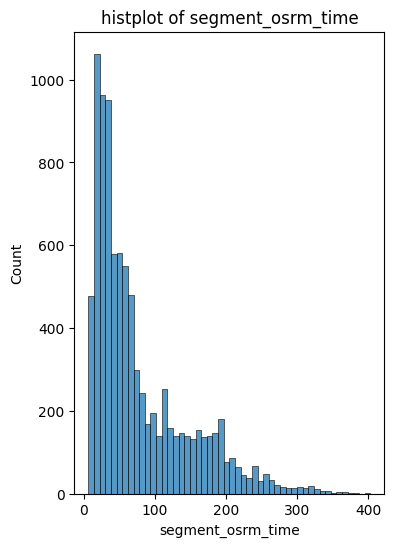

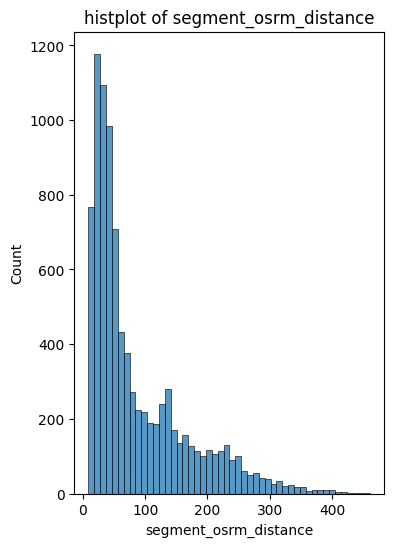

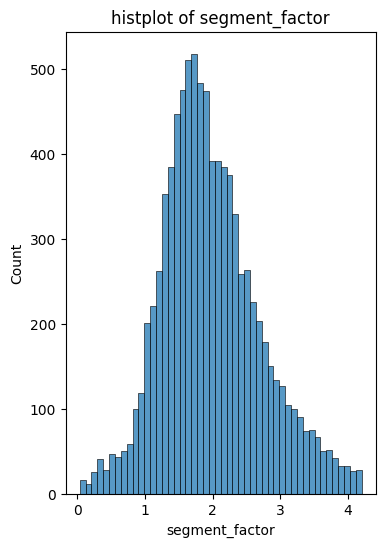

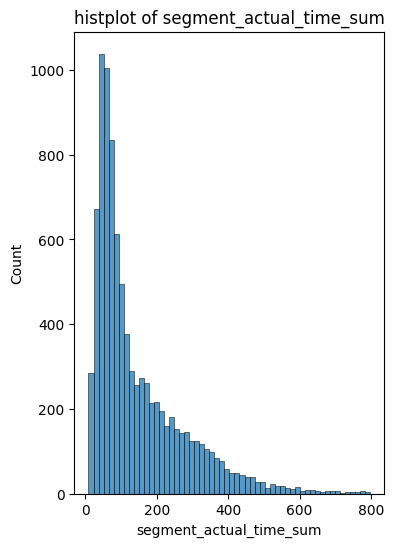

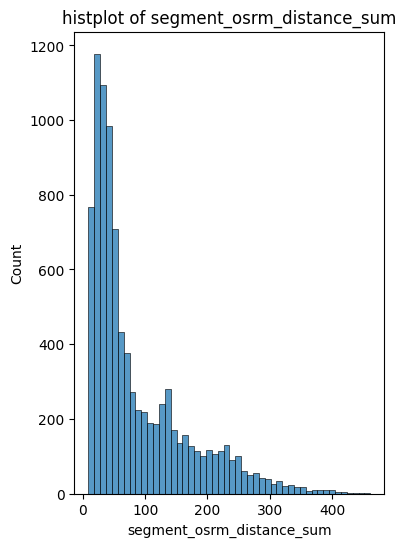

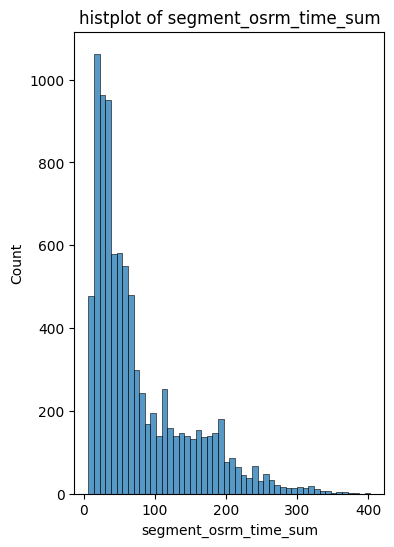

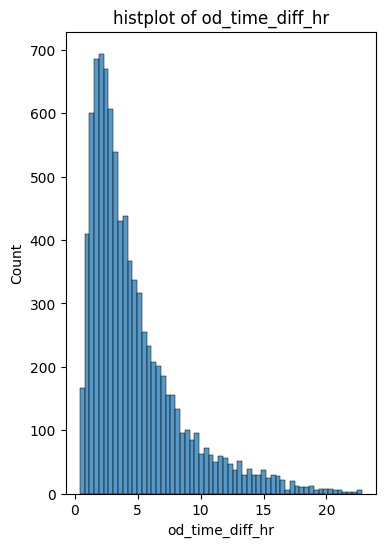

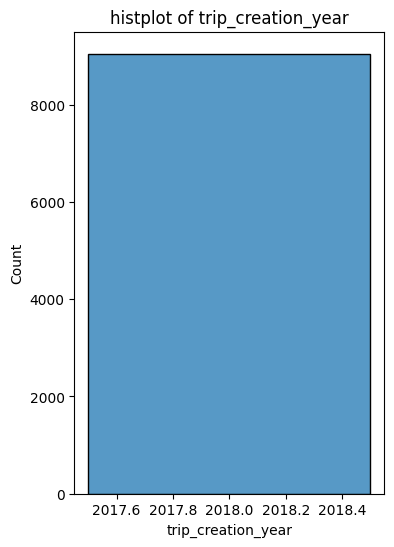

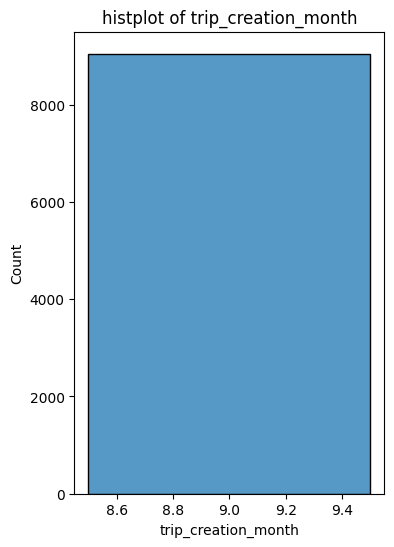

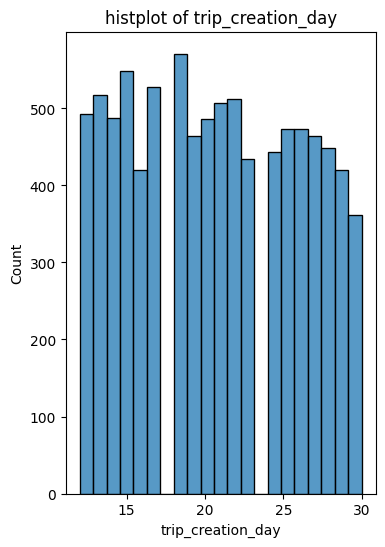

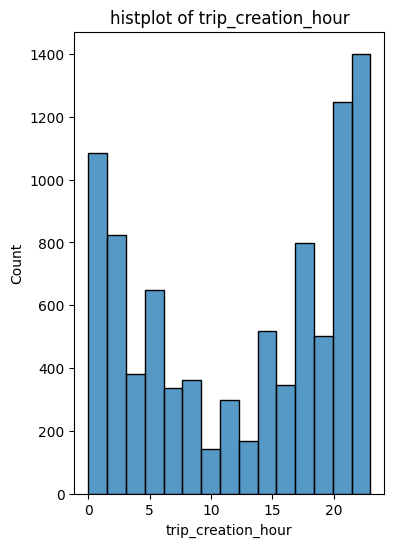

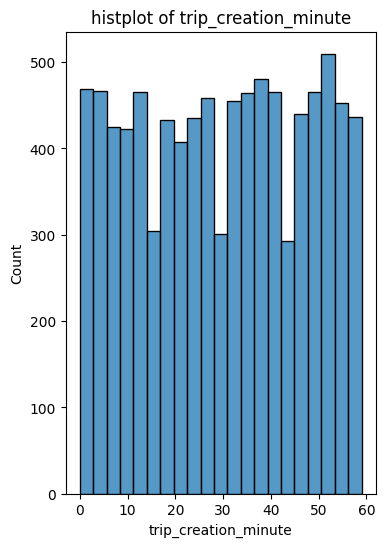

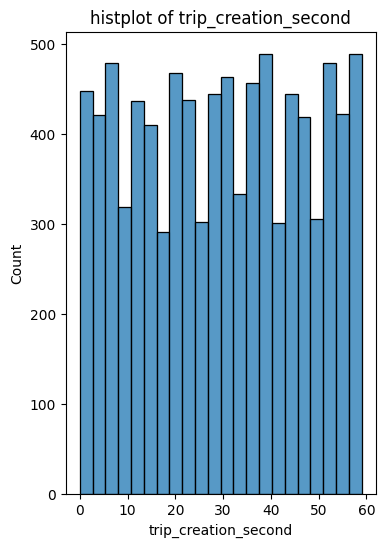

In [112]:
for col in trip_df.select_dtypes(include = 'number'):
  plt.figure(figsize = (4, 6))
  sns.histplot(x = trip_df[col])
  plt.title(f"histplot of {col}")
  plt.xlabel(col)
  plt.show()

21. Using Label Encoder to convert some key categorical columns to number format for better identification, interpreation and analysis.

In [160]:
from sklearn.preprocessing import OneHotEncoder
OneHot_encoder = OneHotEncoder(sparse = False)
import warnings
warnings.filterwarnings("ignore")

categorical_columns = ['data']

for column in categorical_columns:
  trip_df[column] = OneHot_encoder.fit_transform(trip_df[[column]])



22. Applying Log transformation and then scaling operation to numerical columns to  increase the normality and reduce the variance among values inside each column.

In [161]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

log_transform_columns = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
    'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
    'segment_osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
    'segment_osrm_time_sum', 'od_time_diff_hr'
]

for column in log_transform_columns:
    trip_df[column] = np.log1p(trip_df[column])

scaler = StandardScaler()
trip_df[log_transform_columns] = scaler.fit_transform(trip_df[log_transform_columns])

minmax_scaler_columns = ['factor', 'segment_factor']
minmax_scaler = MinMaxScaler()
trip_df[minmax_scaler_columns] = minmax_scaler.fit_transform(trip_df[minmax_scaler_columns])

In [162]:
trip_df.head()

,trip_uuid,segment_key,data,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,cutoff_factor,...,source_city,source_place_code,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second
1,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,0.0,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,0.239841,True,18,...,Doddablpur,ChikaDPP,D,Karnataka,2018,9,12,0,0,22
3,trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,0.0,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,-1.220519,True,9,...,None,None,Hub,Maharashtra,2018,9,12,0,1,0
4,trip-153671052974046625,trip-153671052974046625_IND583101AAA_IND583201AAA,0.0,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,0.782042,True,66,...,Bellary,WrdN1DPP,Dc,Karnataka,2018,9,12,0,2,9
5,trip-153671055416136166,trip-153671055416136166_IND600056AAA_IND602105AAB,0.0,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,IND600056AAA,-1.009092,True,18,...,Chennai,Porur,Poonamallee,Tamil Nadu,2018,9,12,0,2,34
6,trip-153671066201138152,trip-153671066201138152_IND600044AAD_IND600048AAA,0.0,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,IND600048AAA,-1.906860,True,9,...,Chennai,Chrompet,DPC,Tamil Nadu,2018,9,12,0,4,22


23. Histogram Visualization showing approximation to normality for each numerical column after transformation and scaling.

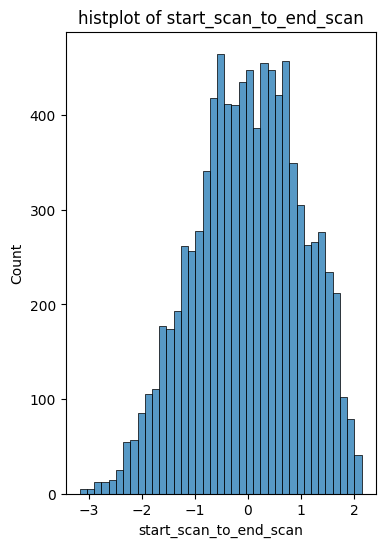

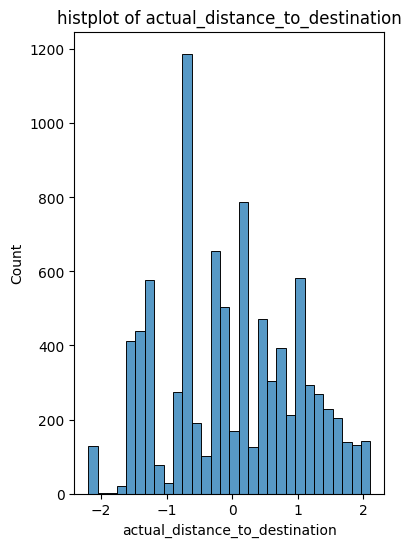

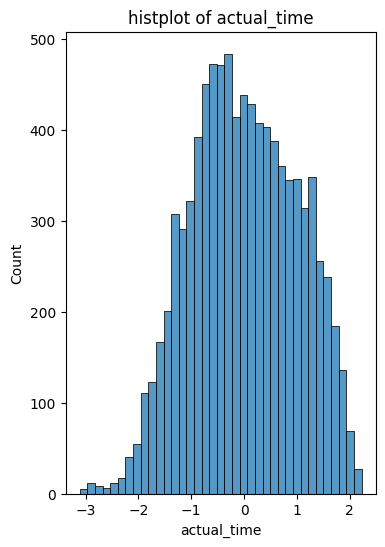

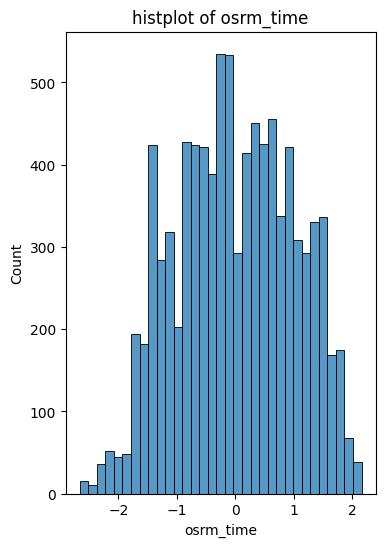

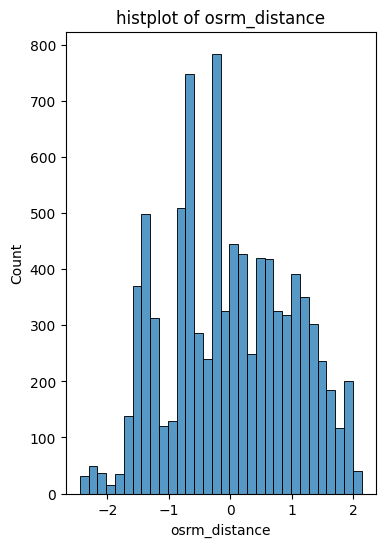

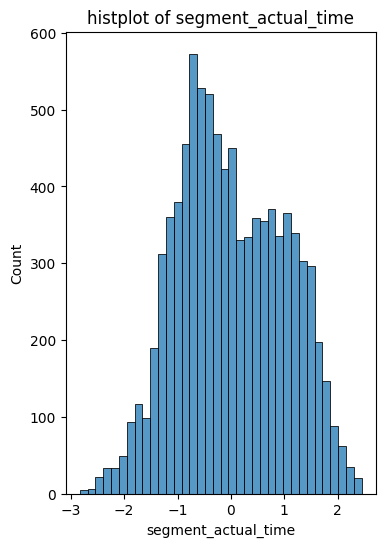

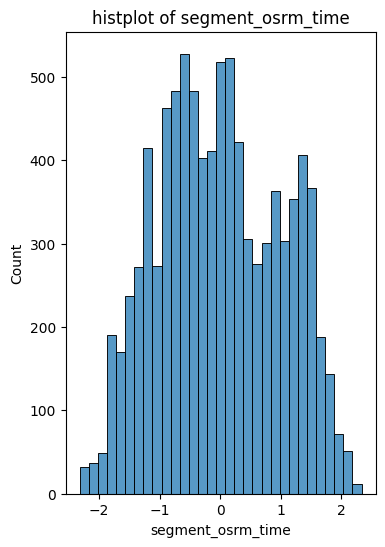

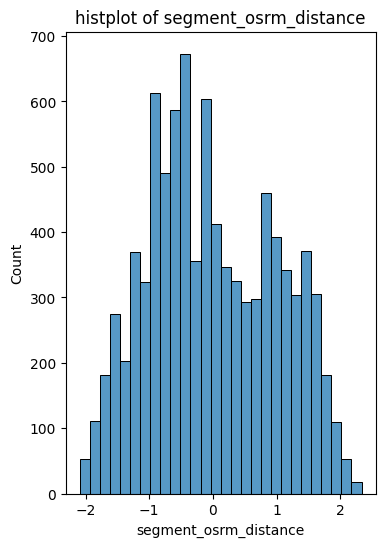

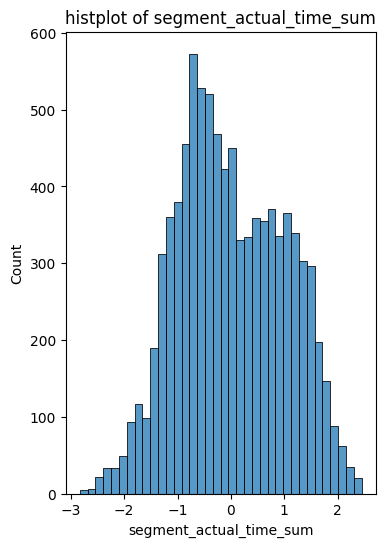

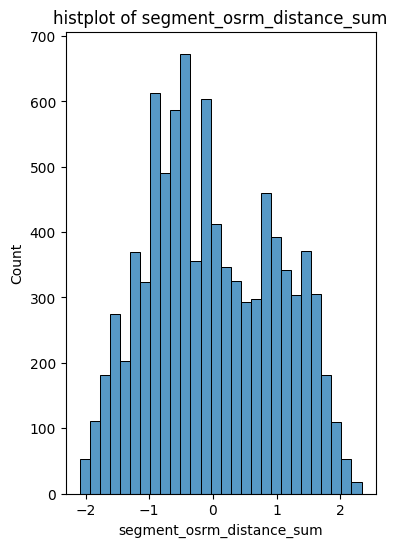

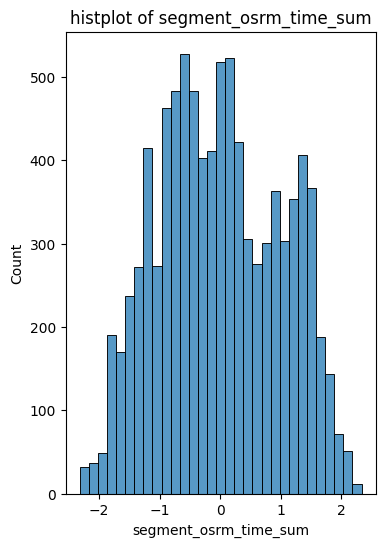

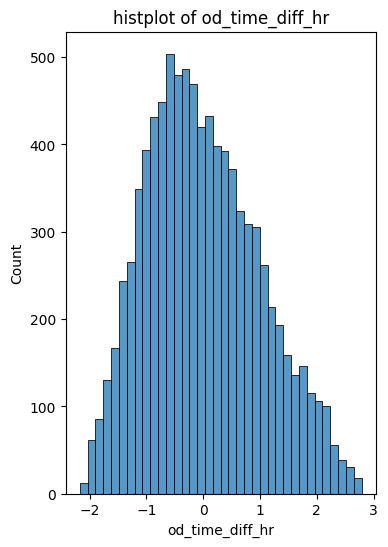

In [116]:
for col in trip_df[log_transform_columns]:
  plt.figure(figsize = (4, 6))
  sns.histplot(x = trip_df[col])
  plt.title(f"histplot of {col}")
  plt.xlabel(col)
  plt.show()

24. Reevaluating the number of columns present in the dataset along with their datatypes.

In [163]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9050 entries, 1 to 13027
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       9050 non-null   object 
 1   segment_key                     9050 non-null   object 
 2   data                            9050 non-null   float64
 3   route_schedule_uuid             9050 non-null   object 
 4   route_type                      9050 non-null   object 
 5   source_center                   9050 non-null   object 
 6   destination_center              9050 non-null   object 
 7   start_scan_to_end_scan          9050 non-null   float64
 8   is_cutoff                       9050 non-null   bool   
 9   cutoff_factor                   9050 non-null   int64  
 10  cutoff_timestamp                9050 non-null   object 
 11  actual_distance_to_destination  9050 non-null   float64
 12  actual_time                     9050 n

25. Visualization and Hypothesis testing of key numeric columns to find out whether there is a difference between estimation and actuals.

Analyzing actual_time vs. osrm_time
Paired T-Test: t-statistic = 0.000, p-value = 1.000
<------------------------------------------------------------>
Wilcoxon Signed-Rank Test: statistic = 20376841.000, p-value = 0.684


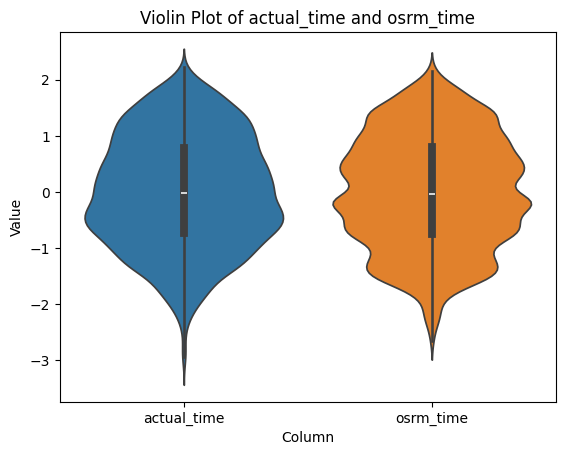

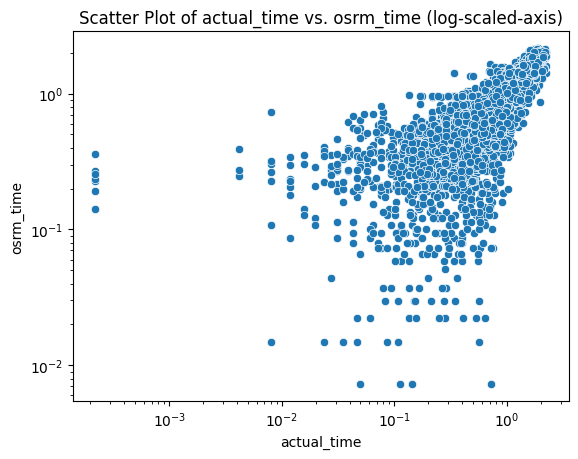

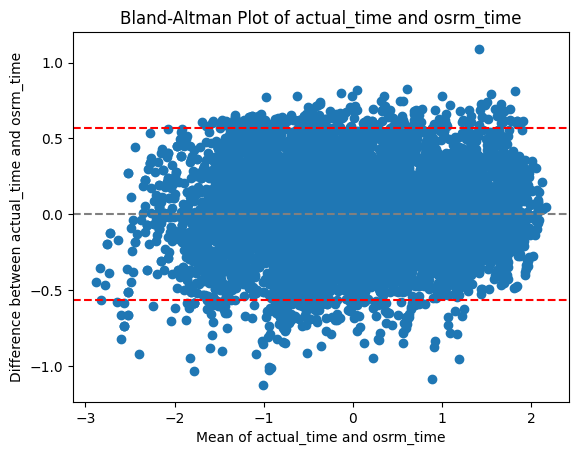

Analyzing actual_time vs. segment_actual_time_sum
Paired T-Test: t-statistic = -0.000, p-value = 1.000
<------------------------------------------------------------>
Wilcoxon Signed-Rank Test: statistic = 20103639.000, p-value = 0.132


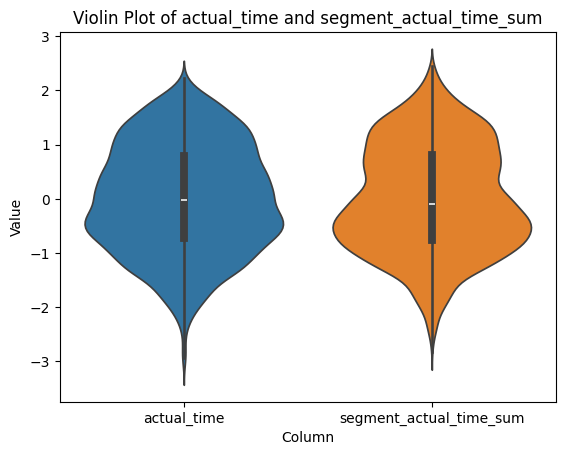

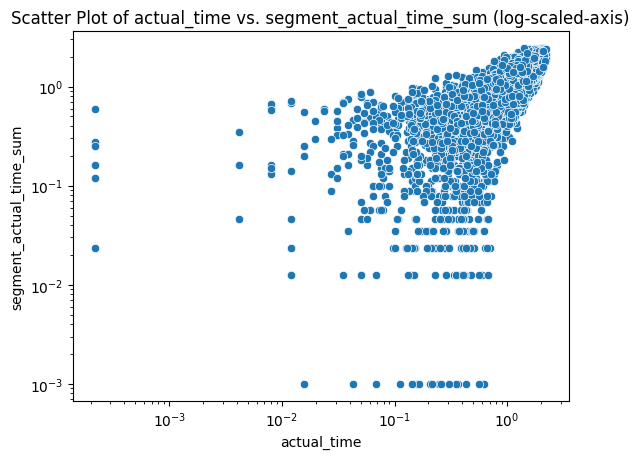

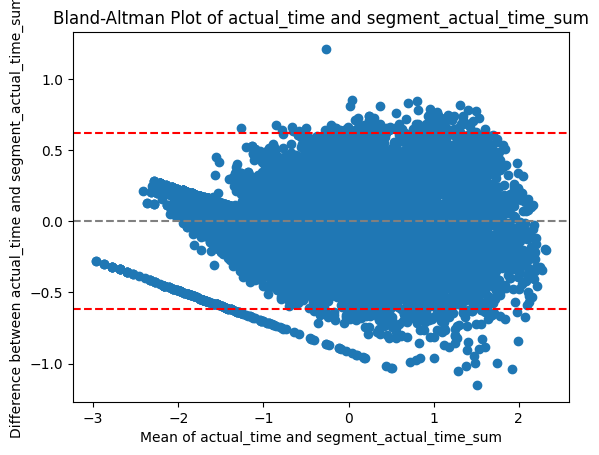

Analyzing osrm_distance vs. segment_osrm_distance_sum
Paired T-Test: t-statistic = -0.000, p-value = 1.000
<------------------------------------------------------------>
Wilcoxon Signed-Rank Test: statistic = 19994050.000, p-value = 0.052


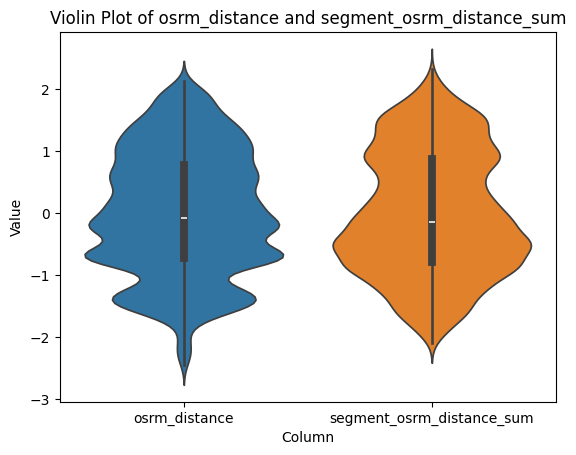

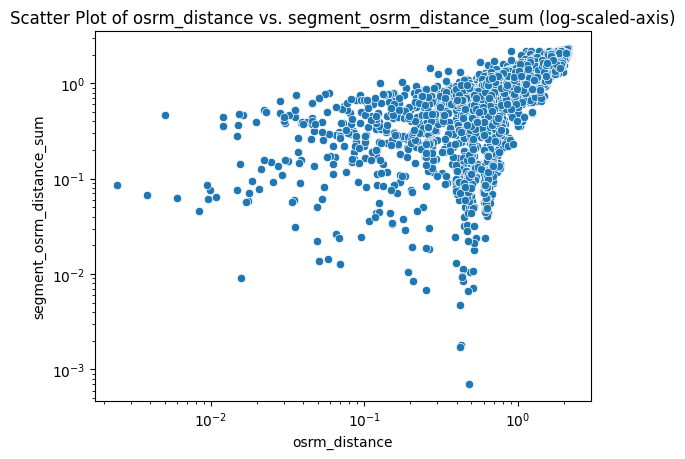

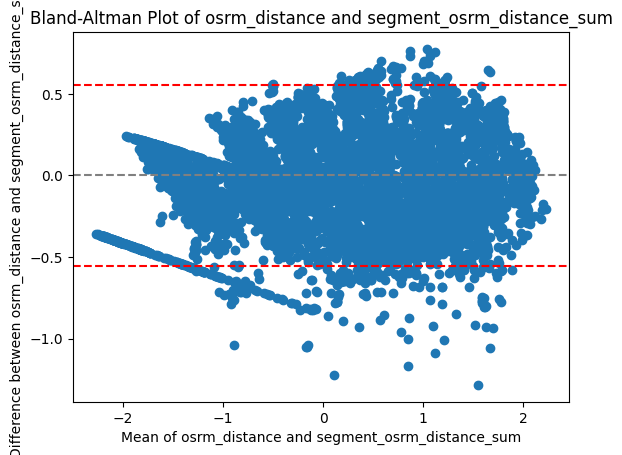

Analyzing osrm_time vs. segment_osrm_time_sum
Paired T-Test: t-statistic = -0.000, p-value = 1.000
<------------------------------------------------------------>
Wilcoxon Signed-Rank Test: statistic = 20137666.000, p-value = 0.171


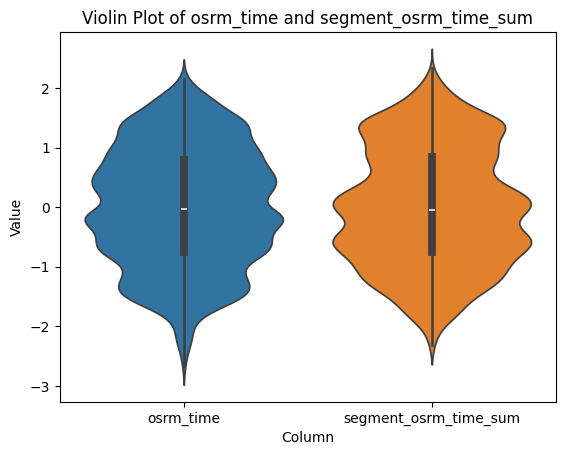

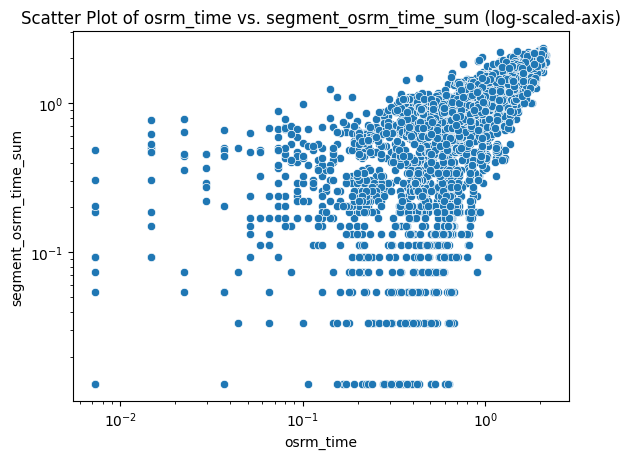

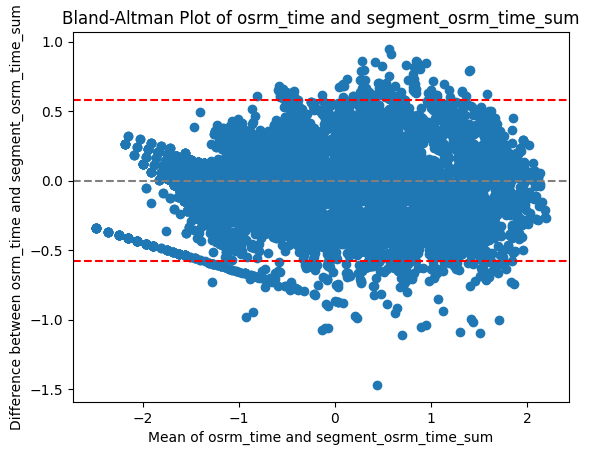

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

# HO: There is no differnece between means of the grouped data.
# H1: There is a significant differnece betweeen means of the grouped data.

# Alpha = 0.05

def analyze_columns(trip_df, col1, col2):
    print(f"Analyzing {col1} vs. {col2}")

    # Paired T-Test
    t_stat, p_val = ttest_rel(trip_df[col1], trip_df[col2])
    print(f'Paired T-Test: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}')

    print("<------------------------------------------------------------>")

    # wilcoxon test
    stat, p_val = wilcoxon(trip_df[col1], trip_df[col2])
    print(f'Wilcoxon Signed-Rank Test: statistic = {stat:.3f}, p-value = {p_val:.3f}')

    # Violin Plot
    sns.violinplot(data= trip_df[[col1, col2]], scale = 'width')
    plt.title(f'Violin Plot of {col1} and {col2}')
    plt.ylabel('Value')
    plt.xlabel('Column')
    plt.show()

    # Scatter Plot
    sns.scatterplot(x=trip_df[col1], y=trip_df[col2])
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs. {col2} (log-scaled-axis)')
    plt.show()

    # Bland-Altman Plot
    mean_diff = trip_df[col1] - trip_df[col2]
    mean_values = (trip_df[col1] + trip_df[col2]) / 2
    plt.scatter(mean_values, mean_diff)
    plt.axhline(np.mean(mean_diff), color='gray', linestyle='--')
    plt.axhline(np.mean(mean_diff) + 1.96 * np.std(mean_diff), color='red', linestyle='--')
    plt.axhline(np.mean(mean_diff) - 1.96 * np.std(mean_diff), color='red', linestyle='--')
    plt.xlabel(f'Mean of {col1} and {col2}')
    plt.ylabel(f'Difference between {col1} and {col2}')
    plt.title(f'Bland-Altman Plot of {col1} and {col2}')
    plt.show()


column_pairs = [('actual_time', 'osrm_time'),
                ('actual_time', 'segment_actual_time_sum'),
                ('osrm_distance', 'segment_osrm_distance_sum'),
                ('osrm_time', 'segment_osrm_time_sum')]

for col1, col2 in column_pairs:
    analyze_columns(trip_df, col1, col2)

Inference:

**('actual_time', 'osrm_time')**

Violin Plot: The distributions of actual_time and osrm_time are similar in central tendency and spread, indicating that the predicted times generally match the actual times, though variability and outliers are present.

Scatter Plot: There is a positive correlation between actual_time and osrm_time, with significant variability at lower time values.

Bland-Altman Plot: The differences between actual_time and osrm_time are mostly centered around zero, indicating no systematic bias, but there are some outliers that reflect discrepancies between the two measurements.

**('actual_time', 'segment actual time sum')**

Violin plot: Both distributions are centered around zero with similar spread, but the shapes indicate slightly different distributions.

Scatter plot:  There is a positive correlation between actual_time and actual_segment_time_sum with a significant variability at lower time values.

Bland-Altman Plot: The differences between actual_time and segment_actual_time_sum are mostly centered around zero, indicating no radical systematic bias.

**('osrm_distance', 'segment_osrm_distance_sum')**

Violin plot: Both distributions are centered around zero with similar spread, but the shape of osrm_distance indicate a varied peakedness with that of segment distribution, thus indicating a realible difference between distributions.

Scatter plot:  There is a positive correlation between osrm_distance and segment_osrm_distance_sum with a significant variability at lower distance values.

Bland-Altman Plot: The differences between osrm_distance and segment_osrm_distance_sum are mostly centered around zero, indicating no radical systematic bias.

**('osrm_time', 'segment_osrm_time_sum')**

Violin plot: Both distributions are centered around zero with similar spread, but the shapes indicate slightly different distributions.

Scatter plot:  There is a positive correlation between osrm_time and segment_osrm_time_sum with very significant variability at lower time values.

Bland-Altman Plot: The differences between osrm_time and segment_osrm_time_sum are mostly centered around zero, indicating no radical systematic bias.

**Wilcoxon tests:**

If we observe the p-values under Wilcoxon test for each combination, we can pretty much conclude that there is no major difference betweeen means of each column, excepet leaving the combination of osrm_distance and segment_osrm_distance_sum, where there is a reliable difference however still it's not below the alpha level of 0.05



26. Calculation of busiest states with more number of orders

In [164]:
trip_df.groupby("destination_state")["segment_key"].size().sort_values(ascending = False)

destination_state
Karnataka                 1614
Maharashtra               1498
Haryana                   1037
Tamil Nadu                 803
Gujarat                    462
Uttar Pradesh              449
Telangana                  439
Delhi                      433
West Bengal                348
Punjab                     339
Rajasthan                  316
Andhra Pradesh             257
Kerala                     213
Bihar                      176
Madhya Pradesh             159
Assam                      105
Uttarakhand                 74
Jharkhand                   63
Chandigarh                  61
Orissa                      61
Himachal Pradesh            40
Chhattisgarh                36
Goa                         20
Dadra and Nagar Haveli      14
Meghalaya                   10
Pondicherry                  7
Arunachal Pradesh            6
Jammu & Kashmir              4
Tripura                      1
Name: segment_key, dtype: int64

**Inference:** Karnataka, Maharastra, Haryana stood as top three states with highest number of orders > 1000.

27. Top 20 busiest cities with more number of orders

In [165]:
trip_df.groupby("destination_city")["segment_key"].size().sort_values(ascending = False).head(20)

destination_city
Bengaluru     891
Mumbai        563
Gurgaon       452
Delhi         370
Bangalore     311
Chennai       303
Bhiwandi      274
Hyderabad     248
Sonipat       237
Pune          187
Chandigarh    165
MAA           135
FBD           110
Jaipur        105
Ahmedabad     102
Noida          92
Kolkata        73
CCU            69
BLR            65
Faridabad      60
Name: segment_key, dtype: int64

**Inference:** Cities Like Bengaluru, Mumbai, gurgaon stood as top three in terms of number of orders > 400.

28. Calculation of Busiest Corridor, avg distance between them, avg time taken, etc.

In [169]:
trip_df['Corridor'] = df['source_center'] + '-->' + df['destination_center']

corridor_counts = trip_df['Corridor'].value_counts().reset_index()
corridor_counts.columns = ['corridor', 'count']

In [170]:
# Find the busiest corridor (highest frequency)
busiest_corridor = corridor_counts.iloc[0]['corridor']

In [171]:
# Calculate average distance and average time for each corridor
corridor_stats = trip_df.groupby('Corridor').agg({
    'segment_osrm_distance': 'mean',
    'segment_actual_time': 'mean'
}).reset_index()
corridor_stats.columns = ['corridor', 'avg_distance', 'avg_time']


In [173]:
# Merge counts with stats
corridor_summary = pd.merge(corridor_counts, corridor_stats,  on='corridor')

In [174]:
# Get stats for the busiest corridor
busiest_corridor_stats = corridor_summary[corridor_summary['corridor'] == busiest_corridor]

# Display the busiest corridor and its stats
print("Busiest Corridor Stats:")
print(busiest_corridor_stats)

# Display overall corridor summary
print("\nOverall Corridor Summary:")
print(corridor_summary)

Busiest Corridor Stats:
                      corridor  count  avg_distance  avg_time
0  IND000000ACB-->IND562132AAA    278      0.151546  0.087325

Overall Corridor Summary:
                         corridor  count  avg_distance  avg_time
0     IND000000ACB-->IND562132AAA    278      0.151546  0.087325
1     IND562132AAA-->IND000000ACB    193      0.196619  0.162765
2     IND000000ACB-->IND712311AAA    176      0.216941  0.279092
3     IND000000ACB-->IND421302AAG    173     -0.002997 -0.064332
4     IND000000ACB-->IND501359AAE    116     -0.005952 -0.038451
...                           ...    ...           ...       ...
1294  IND148101AAA-->IND148102AAA      1     -0.999415 -1.019757
1295  IND263401AAA-->IND244713AAA      1      0.389077  0.373107
1296  IND263153AAB-->IND263401AAA      1      1.458529  1.528103
1297  IND575004AAB-->IND574211AAA      1      1.448117  1.347231
1298  IND382430AAB-->IND382345AAA      1      0.081928 -0.470388

[1299 rows x 4 columns]


**Inference:** Corridor "IND000000ACB-->IND562132AAA" stood as highest trade activity route with a total order amounting to 278. The avg_distance and avg_time were in logarithmic units.

In [14]:
!pip install nbconvert

In [15]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [17]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Delhivery-Dataset@Dhanureddy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Delhivery-Dataset@Dhanureddy.ipynb to pdf
[NbConvertApp] Support files will be in Delhivery-Dataset@Dhanureddy_files/
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Delhivery-Datas

In [16]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive
